<h2 style="margin-bottom: 18px">Index</h2>

* AirBnb datasets
* Data Exploration
* Univariate visualization
    Histograms and density plots
* Multivariate visualization
    Correlation matrix
    Box Plot
    Scatter Plot
* Data Preperation
    Data Filtering
    Fixing Missing Values
    One Hot Encoding
* Data split Preprocessing
* XGBoost Experiments
* LASSO Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()  
import warnings
warnings.filterwarnings('ignore')

In [2]:
airbnbDF = pd.read_csv('airbnb_final_ALL.csv')

In [3]:
airbnbDF.shape

(10809, 23)

In [4]:
airbnbDF.head()

,Unnamed: 0,id,latitude,longitude,neighbourhood_cleansed,price,availability_30,availability_60,availability_90,availability_365,...,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,Zip,Median household income in 1999,Restaurant_Count,Attraction_Count
0,0,2265,30.27752,-97.71377,78702,$200.00,0,7,37,37,...,2 baths,2.0,2.0,"[""Free Street parking"", ""Free dryer \u2013 In ...",7,180,78702.0,23348.0,20,1
1,1,5245,30.27614,-97.71320,78702,$114.00,0,28,58,58,...,1 private bath,1.0,2.0,"[""Free street parking"", ""Air conditioning"", ""L...",30,90,78702.0,23348.0,20,1
2,2,5456,30.26057,-97.73441,78702,$104.00,17,35,55,324,...,1 bath,1.0,2.0,"[""Free street parking"", ""Patio or balcony"", ""E...",2,90,78702.0,23348.0,20,10
3,3,5769,30.45697,-97.78422,78729,$39.00,0,0,0,0,...,1 shared bath,1.0,1.0,"[""Hair dryer"", ""First aid kit"", ""Dishes and si...",1,14,78729.0,59497.0,16,1
4,4,6413,30.24885,-97.73587,78704,$109.00,0,0,0,0,...,1 bath,NaN,1.0,"[""Free street parking"", ""Patio or balcony"", ""A...",3,365,78704.0,35733.0,17,4


In [5]:
# Stripping out spaces from ends of column Names
airbnbDF.columns = [col.strip().replace(' ', '_').lower() for col in airbnbDF.columns]

###  Data Exploration


In [6]:
# some general information about the dataframe
airbnbDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10809 entries, 0 to 10808
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unnamed:_0                       10809 non-null  int64  
 1   id                               10809 non-null  int64  
 2   latitude                         10809 non-null  float64
 3   longitude                        10809 non-null  float64
 4   neighbourhood_cleansed           10809 non-null  int64  
 5   price                            10809 non-null  object 
 6   availability_30                  10809 non-null  int64  
 7   availability_60                  10809 non-null  int64  
 8   availability_90                  10809 non-null  int64  
 9   availability_365                 10809 non-null  int64  
 10  number_of_reviews_ltm            10809 non-null  int64  
 11  property_type                    10809 non-null  object 
 12  room_type         

bool, int64, float64 and object are the data types of our features. We see that 12 features are of type object, 6 features are numeric, and 8 features are float. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 10809 observations, the same number of rows we saw before with shape
We can change the column type with the astype method. Let’s apply this method to the Churn feature to convert it into int64

In [7]:
airbnbDF.shape

(10809, 23)

In [8]:
#For non-numerical features, use include parameter.
airbnbDF.describe(include=['object', 'bool'])

,price,property_type,room_type,bathrooms_text,amenities
count,10809,10809,10809,10794,10809
unique,947,68,4,31,9550
top,$150.00,Entire residential home,Entire home/apt,1 bath,"[""Lockbox"", ""Patio or balcony"", ""Gym"", ""Pool"",..."
freq,259,3327,8681,4857,57


In [9]:
# drop unnamed and id column, as these features won't add any value
airbnbDF.drop(['unnamed:_0','id'], axis=1, inplace=True)

### 1. Univariate visualization



##### 1.1.1 Histograms and density plots

For checking the distribution of a numerical variable we plot histogram using the DataFrame method hist()  


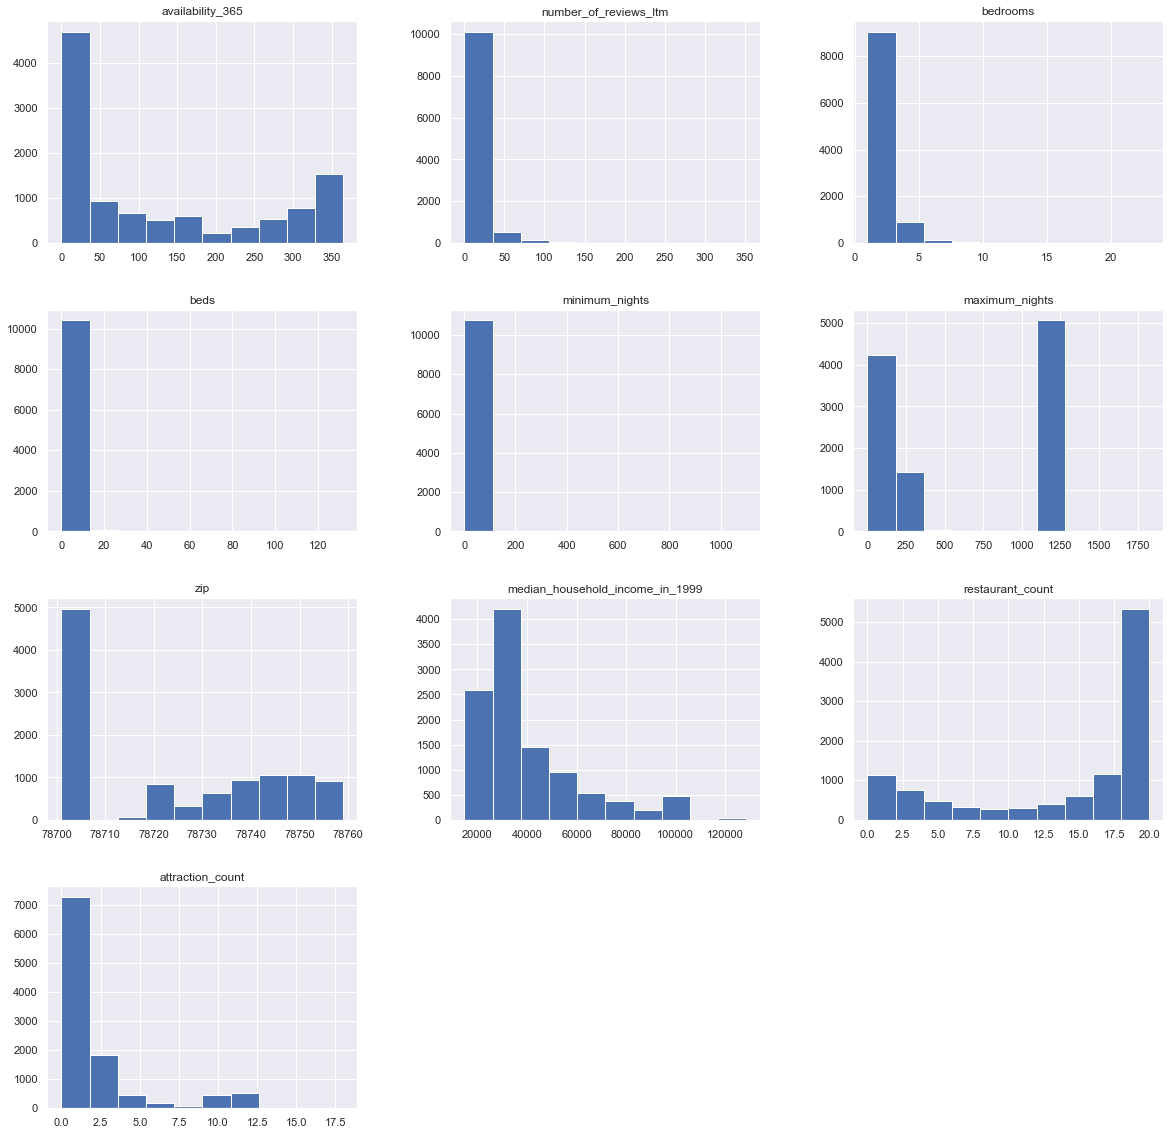

In [10]:
features = [ 'price',
       'availability_365', 'number_of_reviews_ltm', 'property_type',
       'room_type', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'zip',
       'median_household_income_in_1999', 'restaurant_count',
       'attraction_count']

airbnbDF[features].hist(figsize=(20, 20));

<AxesSubplot:xlabel='restaurant_count', ylabel='Density'>

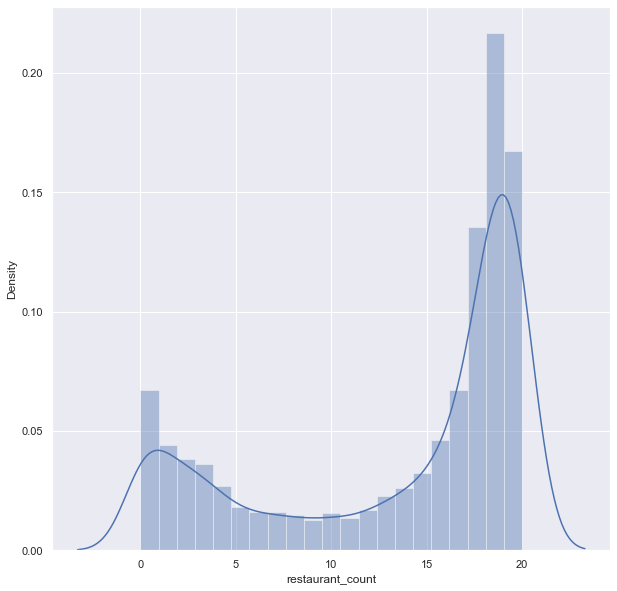

In [11]:

plt.rcParams['figure.figsize'] = 10,10 
sns.distplot(airbnbDF["restaurant_count"]) 


### 2. Multivariate visualization

Multivariate plots allow us to see relationships between two and more different variables, 

#### 2.1 Quantitative–Quantitative

##### 2.1.1 Multicollinearity

Correlations among the numerical variables in our dataset

In [12]:
# get numeric columns
num_airbnb = airbnbDF.select_dtypes(exclude='object')

In [13]:
corr = airbnbDF.corr()

In [14]:
corr['availability_365'].sort_values(ascending=False).head(10).values

array([1.        , 0.72991598, 0.68088856, 0.60890436, 0.16249476,
       0.15555194, 0.14138612, 0.13159549, 0.10447672, 0.09237265])

##### 2.1.2 Correlation matrix

In [15]:
# Create correlation matrix
correlation_matrix = airbnbDF.corr().abs()
correlation_matrix

,latitude,longitude,neighbourhood_cleansed,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,bedrooms,beds,minimum_nights,maximum_nights,zip,median_household_income_in_1999,restaurant_count,attraction_count
latitude,1.000000,0.062642,0.245114,0.047197,0.069987,0.075127,0.079886,0.016102,0.010570,0.001208,0.048392,0.011773,0.245123,0.270838,0.111933,0.054446
longitude,0.062642,1.000000,0.086990,0.069639,0.065208,0.059230,0.103946,0.011840,0.136786,0.122425,0.001491,0.016442,0.086976,0.648742,0.284311,0.086949
neighbourhood_cleansed,0.245114,0.086990,1.000000,0.047313,0.070549,0.071827,0.092373,0.050070,0.023698,0.036702,0.067348,0.009974,1.000000,0.350772,0.443772,0.480558
availability_30,0.047197,0.069639,0.047313,1.000000,0.952733,0.890117,0.608904,0.143461,0.098670,0.132772,0.085190,0.031565,0.047274,0.077850,0.069273,0.033780
availability_60,0.069987,0.065208,0.070549,0.952733,1.000000,0.971387,0.680889,0.164405,0.086506,0.129457,0.091713,0.020992,0.070508,0.085272,0.081073,0.048005
availability_90,0.075127,0.059230,0.071827,0.890117,0.971387,1.000000,0.729916,0.200760,0.081810,0.127439,0.091757,0.016425,0.071782,0.080283,0.077772,0.042002
availability_365,0.079886,0.103946,0.092373,0.608904,0.680889,0.729916,1.000000,0.141386,0.131595,0.162495,0.155552,0.051879,0.092331,0.104477,0.063765,0.056623
number_of_reviews_ltm,0.016102,0.011840,0.050070,0.143461,0.164405,0.200760,0.141386,1.000000,0.016300,0.051492,0.104487,0.022836,0.050096,0.037297,0.000415,0.014654
bedrooms,0.010570,0.136786,0.023698,0.098670,0.086506,0.081810,0.131595,0.016300,1.000000,0.760669,0.040749,0.021212,0.023742,0.141821,0.128507,0.049006
beds,0.001208,0.122425,0.036702,0.132772,0.129457,0.127439,0.162495,0.051492,0.760669,1.000000,0.043937,0.035405,0.036732,0.106540,0.074208,0.018842


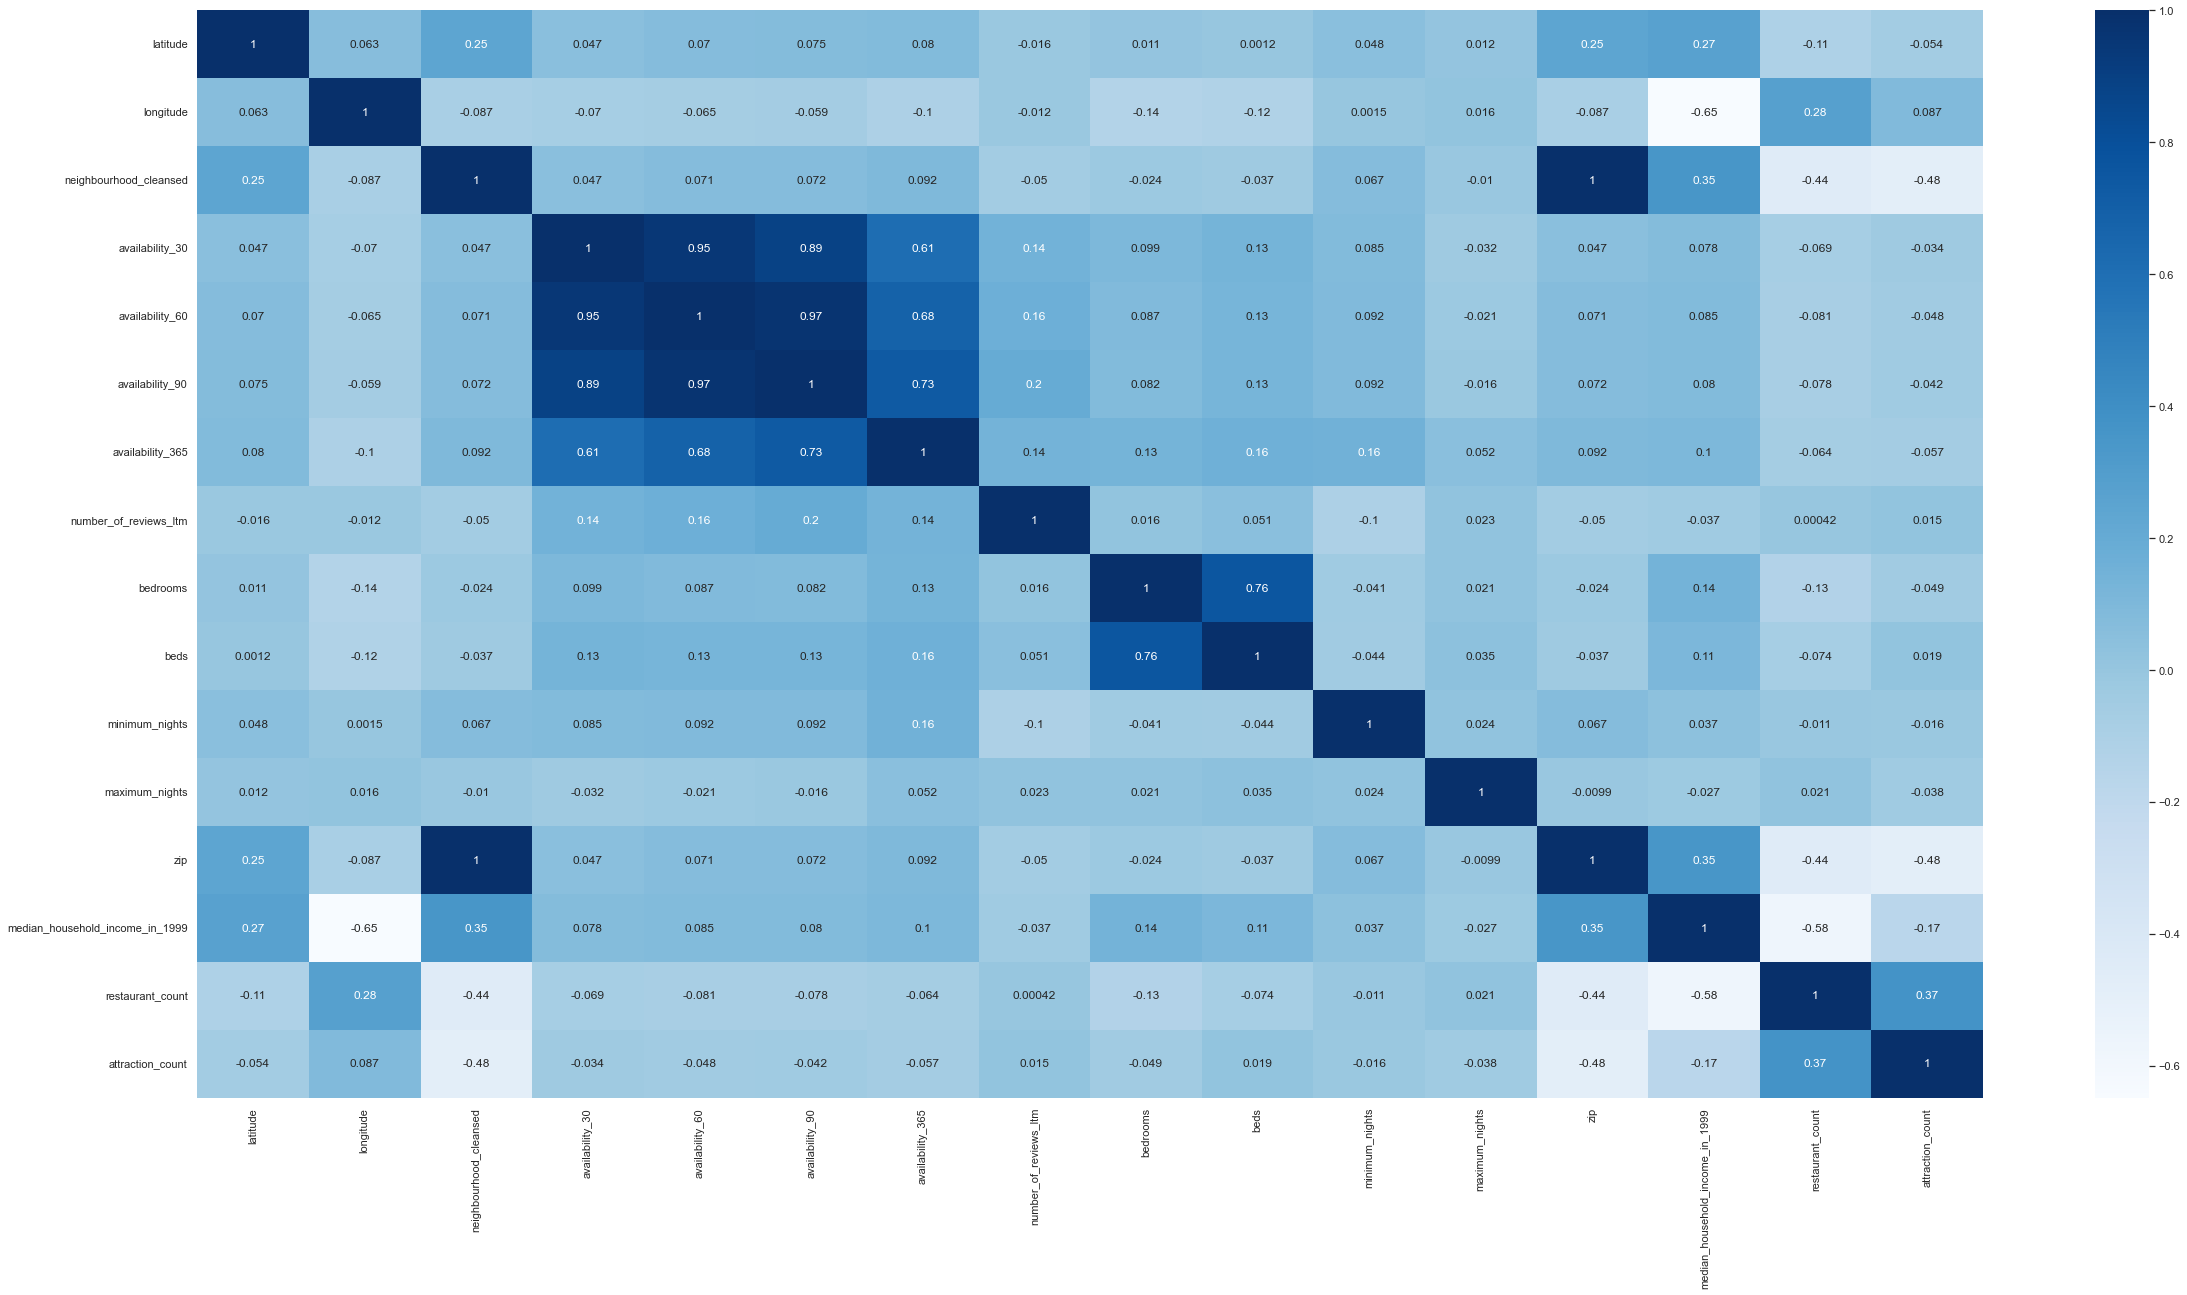

In [16]:
#### Correlation heatmap of the numberic variables, it shows both positive and negative correlation
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(num_airbnb.corr(), cmap='Blues', annot=True, ax=ax);

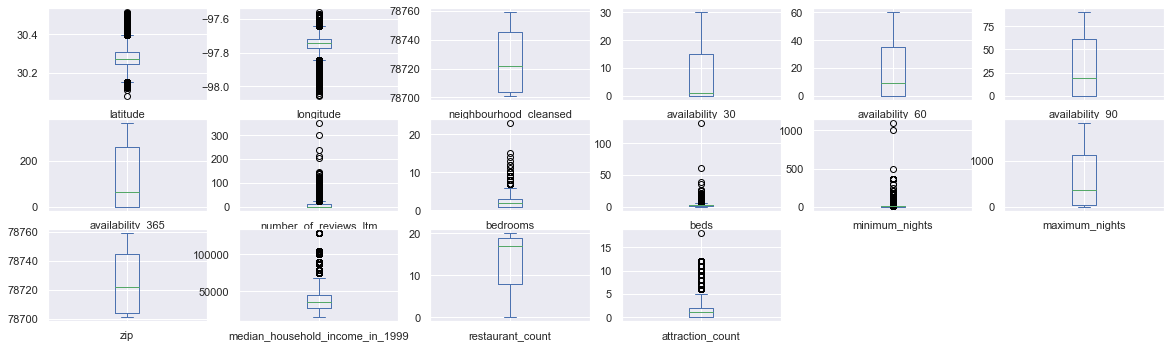

In [17]:
# Box and Whisker Plots for finding the ourliers
plt.rcParams['figure.figsize'] = 20,20 
airbnbDF.plot(kind='box', subplots=True, layout=(10,6), sharex=False, sharey=False)
plt.show()

##### 2.1.2 Scatter plot

The *scatter plot* displays values of two numerical variables as *Cartesian coordinates* in 2D space.

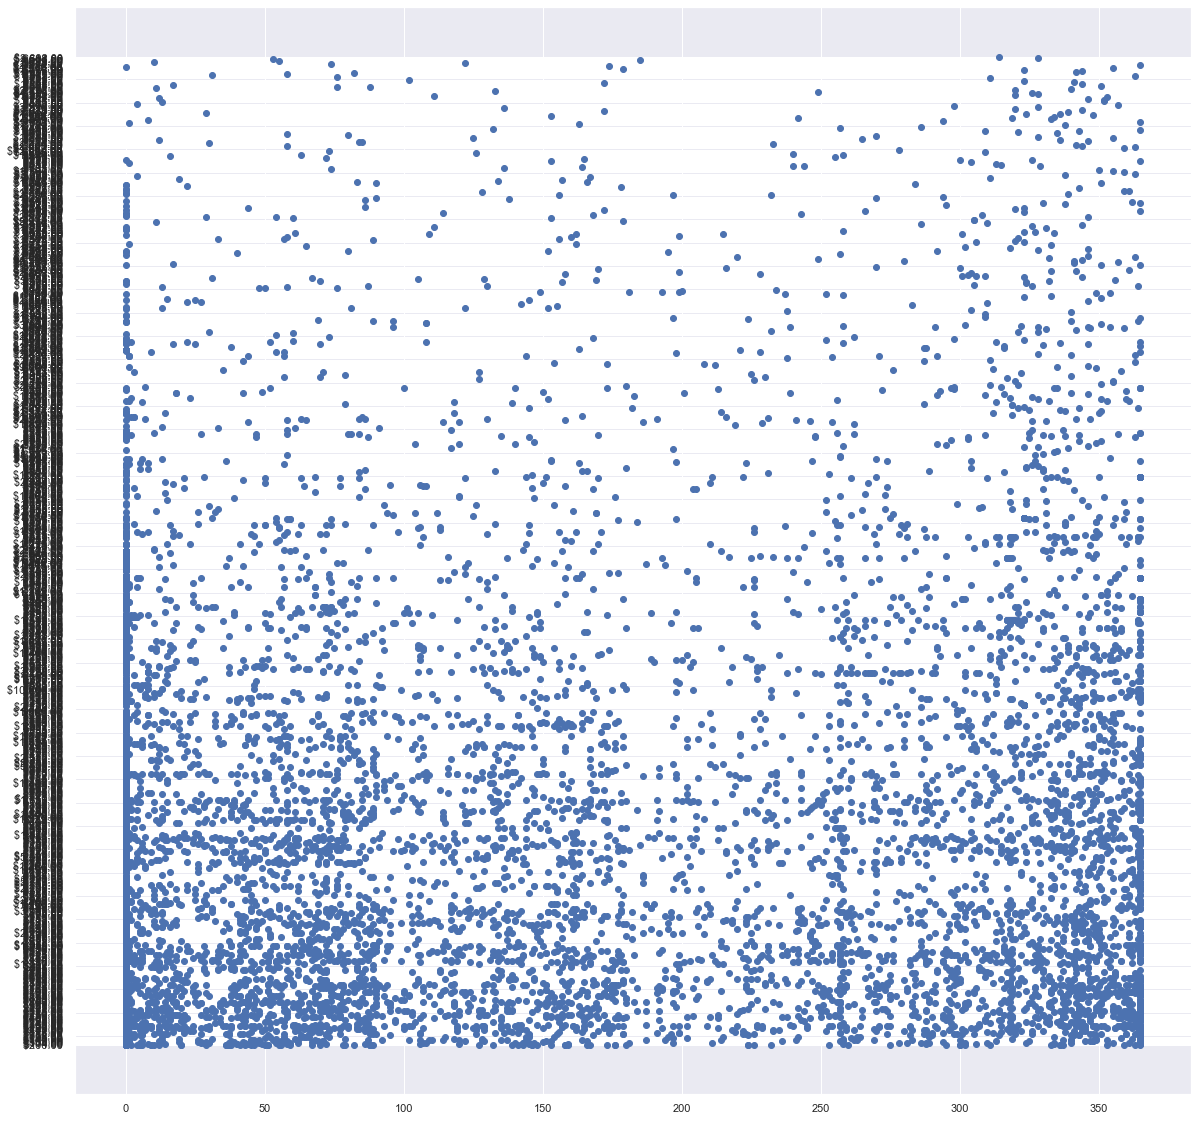

In [18]:
plt.scatter(airbnbDF['availability_365'], airbnbDF['price']);

<a id="III"></a>
# III- Data  Preparation

Preprocessing and exploring data - After extracting the desired features, we partition the data into *training* and *testing* sets.

In [19]:
# Filtering out Data with bedrooms >= 9. Since the amount of such data is less in the dataset
airbnbDF = airbnbDF[airbnbDF.bedrooms <9]
# Removing the Last digit of Zip Code. This helps in clubbing Zip Codes Together. Helps in preventing Overfitting
airbnbDF['zip'] = (airbnbDF['zip'] // 10)
# Extracting Essential Amenities from the Dataset
airbnbDF['freeParking'] = np.where((airbnbDF['amenities'].str.contains('Free street parking', case=False) | airbnbDF['amenities'].str.contains('Free parking on premises', case=False) | airbnbDF['amenities'].str.contains('Free driveway parking', case=False) | airbnbDF['amenities'].str.contains('Free residential garage', case=False) | airbnbDF['amenities'].str.contains('Garage parking', case=False)), True, False)
airbnbDF['paidParking'] = np.where((airbnbDF['amenities'].str.contains('Paid street parking off premises', case=False) | airbnbDF['amenities'].str.contains('Paid parking', case=False)), True, False)
airbnbDF['longTermStay'] = np.where((airbnbDF['amenities'].str.contains('Long term stays allowed', case=False)), True, False)
airbnbDF['kitchen'] = np.where((airbnbDF['amenities'].str.contains('kitchen', case=False) | airbnbDF['amenities'].str.contains('cooking', case=False) | airbnbDF['amenities'].str.contains('BBQ', case=False)), True, False)
airbnbDF['pool'] = np.where((airbnbDF['amenities'].str.contains('Pool', case=False)), True, False)
airbnbDF['gym'] = np.where((airbnbDF['amenities'].str.contains('Gym', case=False)), True, False)
airbnbDF['workspace'] = np.where((airbnbDF['amenities'].str.contains('workspace', case=False) | airbnbDF['amenities'].str.contains('Office', case=False)), True, False)
# The below amenities have been commented out, as they were not improving the r2 of the model any further
# airbnbDF['security'] = np.where((airbnbDF['amenities'].str.contains('security', case=False)), True, False)
# airbnbDF['outdoorSpace'] = np.where((airbnbDF['amenities'].str.contains('patio', case=False) | airbnbDF['amenities'].str.contains('Garden or backyard', case=False) | airbnbDF['amenities'].str.contains('balcony', case=False)), True, False)
# airbnbDF['beach'] = np.where((airbnbDF['amenities'].str.contains('Beach', case=False)), True, False)
airbnbDF.head()

,latitude,longitude,neighbourhood_cleansed,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,property_type,...,median_household_income_in_1999,restaurant_count,attraction_count,freeParking,paidParking,longTermStay,kitchen,pool,gym,workspace
0,30.27752,-97.71377,78702,$200.00,0,7,37,37,2,Entire residential home,...,23348.0,20,1,True,True,True,True,False,False,True
1,30.27614,-97.71320,78702,$114.00,0,28,58,58,0,Private room in residential home,...,23348.0,20,1,True,False,True,True,False,False,True
2,30.26057,-97.73441,78702,$104.00,17,35,55,324,35,Entire guesthouse,...,23348.0,20,10,True,False,True,True,False,False,False
3,30.45697,-97.78422,78729,$39.00,0,0,0,0,7,Private room in residential home,...,59497.0,16,1,True,False,False,True,False,False,False
5,30.26034,-97.76487,78704,$149.00,13,24,33,187,19,Entire guesthouse,...,35733.0,20,4,True,False,True,True,False,False,True


In [20]:
# Drop $ sign from Price
airbnbDF["price"] = (airbnbDF["price"].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
print(airbnbDF["price"])

0        200.0
1        114.0
2        104.0
3         39.0
5        149.0
         ...  
10804    112.0
10805    349.0
10806    349.0
10807    214.0
10808    120.0
Name: price, Length: 10080, dtype: float64


In [21]:
#drop neighbourhood_cleansed column as it is same as zip
airbnbDF.drop('neighbourhood_cleansed', axis=1, inplace=True)

###  1. Fixing missing values 

In [22]:
airbnbDF.describe()

,latitude,longitude,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,bedrooms,beds,minimum_nights,maximum_nights,zip,median_household_income_in_1999,restaurant_count,attraction_count
count,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,9767.000000,10080.000000,10080.00000,10079.000000,10079.000000,10080.000000,10080.000000
mean,30.280901,-97.752684,283.808135,7.987202,17.800298,30.731448,125.370635,7.929960,1.922817,2.515819,8.521528,598.21756,7872.029368,41749.998016,13.503671,1.832341
std,0.061719,0.060313,522.821485,10.027046,20.401124,32.501475,137.247428,16.796727,1.166722,2.133457,25.683017,510.99422,2.020615,20697.749185,7.083166,3.028761
min,30.078870,-98.056630,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,7870.000000,14740.000000,0.000000,0.000000
25%,30.243688,-97.771425,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,30.00000,7870.000000,26646.000000,7.000000,0.000000
50%,30.268800,-97.744220,156.000000,1.000000,9.000000,18.000000,66.000000,0.000000,2.000000,2.000000,2.000000,365.00000,7872.000000,35733.000000,17.000000,1.000000
75%,30.306185,-97.720157,295.000000,15.000000,35.000000,61.000000,265.000000,8.000000,3.000000,3.000000,3.000000,1125.00000,7874.000000,45090.000000,19.000000,2.000000
max,30.515090,-97.560620,12980.000000,30.000000,60.000000,90.000000,365.000000,352.000000,8.000000,36.000000,1100.000000,1825.00000,7875.000000,128524.000000,20.000000,18.000000


In [23]:
airbnbDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 10808
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   latitude                         10080 non-null  float64
 1   longitude                        10080 non-null  float64
 2   price                            10080 non-null  float64
 3   availability_30                  10080 non-null  int64  
 4   availability_60                  10080 non-null  int64  
 5   availability_90                  10080 non-null  int64  
 6   availability_365                 10080 non-null  int64  
 7   number_of_reviews_ltm            10080 non-null  int64  
 8   property_type                    10080 non-null  object 
 9   room_type                        10080 non-null  object 
 10  bathrooms_text                   10068 non-null  object 
 11  bedrooms                         10080 non-null  float64
 12  beds              

In [24]:
airbnbDF.isna().sum()

latitude                             0
longitude                            0
price                                0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews_ltm                0
property_type                        0
room_type                            0
bathrooms_text                      12
bedrooms                             0
beds                               313
amenities                            0
minimum_nights                       0
maximum_nights                       0
zip                                  1
median_household_income_in_1999      1
restaurant_count                     0
attraction_count                     0
freeParking                          0
paidParking                          0
longTermStay                         0
kitchen                              0
pool                                 0
gym                      

#### Impute missing values 

Impute the numerical data of restaurant_count and attraction_count column with 0 and other columns with mode. 


In [25]:
# add 0 to missing values, we don't want to impute with any assumed value so keep 0 for value
median_household_income_mode = airbnbDF.median_household_income_in_1999.mode()
airbnbDF.median_household_income_in_1999.fillna(median_household_income_mode, inplace=True)
airbnbDF.restaurant_count.fillna(0, inplace=True)
airbnbDF.attraction_count.fillna(0, inplace=True)

In [26]:
# add mean value to missing values
bedrooms_mode = airbnbDF.bedrooms.mode()
airbnbDF.bedrooms.fillna(bedrooms_mode, inplace=True)
# Setting numeber of beds = number of bedrooms for missing no of Beds
airbnbDF.beds.fillna(airbnbDF.bedrooms, inplace=True)
print(bedrooms_mode)

0    1.0
dtype: float64


In [27]:
airbnbDF['bedrooms'].isnull().sum()
airbnbDF['beds'].isnull().sum()

0

In [28]:
#delete bathroom text, room type has the same info, avoid collinearity 
airbnbDF.drop('bathrooms_text', axis=1, inplace=True)
print(airbnbDF.shape)
airbnbDF.head(5)

(10080, 26)


,latitude,longitude,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,property_type,room_type,...,median_household_income_in_1999,restaurant_count,attraction_count,freeParking,paidParking,longTermStay,kitchen,pool,gym,workspace
0,30.27752,-97.71377,200.0,0,7,37,37,2,Entire residential home,Entire home/apt,...,23348.0,20,1,True,True,True,True,False,False,True
1,30.27614,-97.71320,114.0,0,28,58,58,0,Private room in residential home,Private room,...,23348.0,20,1,True,False,True,True,False,False,True
2,30.26057,-97.73441,104.0,17,35,55,324,35,Entire guesthouse,Entire home/apt,...,23348.0,20,10,True,False,True,True,False,False,False
3,30.45697,-97.78422,39.0,0,0,0,0,7,Private room in residential home,Private room,...,59497.0,16,1,True,False,False,True,False,False,False
5,30.26034,-97.76487,149.0,13,24,33,187,19,Entire guesthouse,Entire home/apt,...,35733.0,20,4,True,False,True,True,False,False,True


In [29]:
# Finally, drop the row when zipcode is null. 
airbnbDF = airbnbDF.dropna(subset=['zip'])
print("Data to Impute")
airbnbDF.head(3)

Data to Impute


,latitude,longitude,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,property_type,room_type,...,median_household_income_in_1999,restaurant_count,attraction_count,freeParking,paidParking,longTermStay,kitchen,pool,gym,workspace
0,30.27752,-97.71377,200.0,0,7,37,37,2,Entire residential home,Entire home/apt,...,23348.0,20,1,True,True,True,True,False,False,True
1,30.27614,-97.71320,114.0,0,28,58,58,0,Private room in residential home,Private room,...,23348.0,20,1,True,False,True,True,False,False,True
2,30.26057,-97.73441,104.0,17,35,55,324,35,Entire guesthouse,Entire home/apt,...,23348.0,20,10,True,False,True,True,False,False,False


In [30]:
airbnbDF.isna().sum()

latitude                           0
longitude                          0
price                              0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews_ltm              0
property_type                      0
room_type                          0
bedrooms                           0
beds                               0
amenities                          0
minimum_nights                     0
maximum_nights                     0
zip                                0
median_household_income_in_1999    0
restaurant_count                   0
attraction_count                   0
freeParking                        0
paidParking                        0
longTermStay                       0
kitchen                            0
pool                               0
gym                                0
workspace                          0
dtype: int64

#### Data Transformation

Converting Categorical Data into Numeric Form using One Hot Encoding

In [31]:
airbnbDF_copy = airbnbDF

airbnbDF_copy_categorical = airbnbDF_copy.select_dtypes(exclude=[np.number])

airbnbDF_copy_categorical.head()

,property_type,room_type,amenities,freeParking,paidParking,longTermStay,kitchen,pool,gym,workspace
0,Entire residential home,Entire home/apt,"[""Free Street parking"", ""Free dryer \u2013 In ...",True,True,True,True,False,False,True
1,Private room in residential home,Private room,"[""Free street parking"", ""Air conditioning"", ""L...",True,False,True,True,False,False,True
2,Entire guesthouse,Entire home/apt,"[""Free street parking"", ""Patio or balcony"", ""E...",True,False,True,True,False,False,False
3,Private room in residential home,Private room,"[""Hair dryer"", ""First aid kit"", ""Dishes and si...",True,False,False,True,False,False,False
5,Entire guesthouse,Entire home/apt,"[""Room-darkening shades"", ""Free street parking...",True,False,True,True,False,False,True


In [32]:
# Categorical boolean mask
categorical_feature_mask = airbnbDF_copy.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = airbnbDF_copy.columns[categorical_feature_mask].tolist()

categorical_cols

['property_type', 'room_type', 'amenities']

In [33]:
#delete property_type, amenities from the dataset
airbnbDF_copy.drop(['property_type', 'amenities'], axis=1, inplace=True)
print(airbnbDF_copy.shape)
airbnbDF_copy.head(5)

(10079, 24)


,latitude,longitude,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,room_type,bedrooms,...,median_household_income_in_1999,restaurant_count,attraction_count,freeParking,paidParking,longTermStay,kitchen,pool,gym,workspace
0,30.27752,-97.71377,200.0,0,7,37,37,2,Entire home/apt,2.0,...,23348.0,20,1,True,True,True,True,False,False,True
1,30.27614,-97.71320,114.0,0,28,58,58,0,Private room,1.0,...,23348.0,20,1,True,False,True,True,False,False,True
2,30.26057,-97.73441,104.0,17,35,55,324,35,Entire home/apt,1.0,...,23348.0,20,10,True,False,True,True,False,False,False
3,30.45697,-97.78422,39.0,0,0,0,0,7,Private room,1.0,...,59497.0,16,1,True,False,False,True,False,False,False
5,30.26034,-97.76487,149.0,13,24,33,187,19,Entire home/apt,1.0,...,35733.0,20,4,True,False,True,True,False,False,True


In [34]:
print(airbnbDF_copy_categorical['room_type'].unique())

['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


In [35]:
airbnbDF_copy_categorical.head()

,property_type,room_type,amenities,freeParking,paidParking,longTermStay,kitchen,pool,gym,workspace
0,Entire residential home,Entire home/apt,"[""Free Street parking"", ""Free dryer \u2013 In ...",True,True,True,True,False,False,True
1,Private room in residential home,Private room,"[""Free street parking"", ""Air conditioning"", ""L...",True,False,True,True,False,False,True
2,Entire guesthouse,Entire home/apt,"[""Free street parking"", ""Patio or balcony"", ""E...",True,False,True,True,False,False,False
3,Private room in residential home,Private room,"[""Hair dryer"", ""First aid kit"", ""Dishes and si...",True,False,False,True,False,False,False
5,Entire guesthouse,Entire home/apt,"[""Room-darkening shades"", ""Free street parking...",True,False,True,True,False,False,True


#### Label Encoding

In [36]:
# data_column_category = airbnbDF_copy.select_dtypes(exclude=[np.number]).columns
data_column_category = airbnbDF_copy.select_dtypes(include=object).columns
print(data_column_category)

Index(['room_type'], dtype='object')


#### 3.3 One-Hot Encoding


In [37]:
#Onehot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(airbnbDF_copy[data_column_category])

In [38]:
onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names(data_column_category))

onehot_encoded_frame.head()

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [39]:
# Stripping out spaces from ends of names, and replacing internal spaces with "_", why? it is easy to handle and progr
print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
onehot_encoded_frame.columns = [col.strip().replace(' ', '_').lower() for col in onehot_encoded_frame.columns]

onehot_encoded_frame.columns = [col.strip().replace('/', '_').lower() for col in onehot_encoded_frame.columns]

# Print edited column names
print("\nNew Column Names:\n", onehot_encoded_frame.columns)


Stripping spaces from ends of column names; replacing internal spaces with '_'


New Column Names:
 Index(['room_type_entire_home_apt', 'room_type_hotel_room',
       'room_type_private_room', 'room_type_shared_room'],
      dtype='object')


In [40]:
# Join the encoded data frame to airbnb data frame
airbnbDF_copy = airbnbDF_copy.join(onehot_encoded_frame)
airbnbDF_copy.head()

,latitude,longitude,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,room_type,bedrooms,...,paidParking,longTermStay,kitchen,pool,gym,workspace,room_type_entire_home_apt,room_type_hotel_room,room_type_private_room,room_type_shared_room
0,30.27752,-97.71377,200.0,0,7,37,37,2,Entire home/apt,2.0,...,True,True,True,False,False,True,1.0,0.0,0.0,0.0
1,30.27614,-97.71320,114.0,0,28,58,58,0,Private room,1.0,...,False,True,True,False,False,True,0.0,0.0,1.0,0.0
2,30.26057,-97.73441,104.0,17,35,55,324,35,Entire home/apt,1.0,...,False,True,True,False,False,False,1.0,0.0,0.0,0.0
3,30.45697,-97.78422,39.0,0,0,0,0,7,Private room,1.0,...,False,False,True,False,False,False,0.0,0.0,1.0,0.0
5,30.26034,-97.76487,149.0,13,24,33,187,19,Entire home/apt,1.0,...,False,True,True,False,False,True,1.0,0.0,0.0,0.0


In [41]:
# Drop original columns that have been one hot encoded encoded
airbnbDF_copy = airbnbDF_copy.drop('room_type',axis = 1)
# airbnbDF_copy = airbnbDF_copy.drop('freeParking',axis = 1)
# airbnbDF_copy = airbnbDF_copy.drop('paidParking',axis = 1)
# airbnbDF_copy = airbnbDF_copy.drop('longTermStay',axis = 1)
# airbnbDF_copy = airbnbDF_copy.drop('kitchen',axis = 1)
# airbnbDF_copy = airbnbDF_copy.drop('pool',axis = 1)
# airbnbDF_copy = airbnbDF_copy.drop('gym',axis = 1)
# airbnbDF_copy = airbnbDF_copy.drop('workspace',axis = 1)


In [42]:
# One hot Encoding Zip Code Column
airbnbDF_copy["zip"] = airbnbDF_copy.zip.astype(object)
print(airbnbDF_copy["zip"])

0        7870.0
1        7870.0
2        7870.0
3        7872.0
5        7870.0
          ...  
10804    7873.0
10805    7874.0
10806    7874.0
10807    7874.0
10808    7873.0
Name: zip, Length: 10079, dtype: object


In [43]:
data_column_category = airbnbDF_copy.select_dtypes(include=object).columns
data_column_category

Index(['zip'], dtype='object')

In [44]:
onehot_encoder_zip = OneHotEncoder(sparse=False)

onehot_encoded_zip = onehot_encoder_zip.fit_transform(airbnbDF_copy[data_column_category])

onehot_encoded_zip_df = pd.DataFrame(onehot_encoded_zip, columns = onehot_encoder_zip.get_feature_names(data_column_category))

onehot_encoded_zip_df

,zip_7870.0,zip_7871.0,zip_7872.0,zip_7873.0,zip_7874.0,zip_7875.0
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10074,0.0,0.0,0.0,1.0,0.0,0.0
10075,0.0,0.0,0.0,0.0,1.0,0.0
10076,0.0,0.0,0.0,0.0,1.0,0.0
10077,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
onehot_encoded_zip_df.columns = [col.strip().replace('.', '_').lower() for col in onehot_encoded_zip_df.columns]
onehot_encoded_zip_df

,zip_7870_0,zip_7871_0,zip_7872_0,zip_7873_0,zip_7874_0,zip_7875_0
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10074,0.0,0.0,0.0,1.0,0.0,0.0
10075,0.0,0.0,0.0,0.0,1.0,0.0
10076,0.0,0.0,0.0,0.0,1.0,0.0
10077,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
# Join the encoded data frame to airbnb data frame
airbnbDF_copy = airbnbDF_copy.join(onehot_encoded_zip_df)

In [47]:
# Drop column Zip as it is now encoded
airbnbDF_copy = airbnbDF_copy.drop("zip",axis = 1)

In [48]:
airbnbDF_copy.head()

,latitude,longitude,price,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,bedrooms,beds,...,room_type_entire_home_apt,room_type_hotel_room,room_type_private_room,room_type_shared_room,zip_7870_0,zip_7871_0,zip_7872_0,zip_7873_0,zip_7874_0,zip_7875_0
0,30.27752,-97.71377,200.0,0,7,37,37,2,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,30.27614,-97.71320,114.0,0,28,58,58,0,1.0,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,30.26057,-97.73441,104.0,17,35,55,324,35,1.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,30.45697,-97.78422,39.0,0,0,0,0,7,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,30.26034,-97.76487,149.0,13,24,33,187,19,1.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
airbnbDF_copy['room_type_hotel_room'] = airbnbDF_copy['room_type_hotel_room'].fillna(1)
airbnbDF_copy['room_type_entire_home_apt'] = airbnbDF_copy['room_type_entire_home_apt'].fillna(1)
airbnbDF_copy['room_type_private_room'] = airbnbDF_copy['room_type_private_room'].fillna(1)
airbnbDF_copy['room_type_shared_room'] = airbnbDF_copy['room_type_shared_room'].fillna(1)

In [50]:
airbnbDF_copy.fillna(0, inplace=True)

In [51]:
airbnbDF_copy.isnull().sum()

latitude                           0
longitude                          0
price                              0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews_ltm              0
bedrooms                           0
beds                               0
minimum_nights                     0
maximum_nights                     0
median_household_income_in_1999    0
restaurant_count                   0
attraction_count                   0
freeParking                        0
paidParking                        0
longTermStay                       0
kitchen                            0
pool                               0
gym                                0
workspace                          0
room_type_entire_home_apt          0
room_type_hotel_room               0
room_type_private_room             0
room_type_shared_room              0
zip_7870_0                         0
z

In [52]:
# Generating X and Y from Dataframe
X = airbnbDF_copy.drop(['availability_365', 'availability_30','availability_60','availability_90'], axis = 1)
# X = X.drop(['freeparking_false', 'paidparking_false','longtermstay_false','kitchen_false','pool_false', 'gym_false','workspace_false'], axis = 1)
y = airbnbDF_copy.availability_365
# 'beach_false''security_false','outdoorspace_false' , 'attraction_count' , 'restaurant_count', 'median_household_income_in_1999'

<h2 id="t1" style="margin-bottom: 18px">Data split Preprocessing</h2>


In [53]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state=12)

## Training XGBost Algorithm

XGBoost Experiments:

In [54]:

from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
import pickle

## EXPERIMENT 1 - With all Neighborhood Conditions 

training_features.head()
training_features1 = training_features.drop([ 'latitude', 'longitude'], axis = 1)
test_features1 = test_features.drop(['latitude', 'longitude'], axis = 1)
req = pd.DataFrame(columns=test_features1.columns)
req.loc[0] = [49.0, 0.0, 1.0, 1.0, 2.0, 1125.0, 23348.0, 20.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0,0.0,0.0,0.0,0.0]

# xgR =  XGBRegressor(random_state=66, n_jobs=4)
# check_params = {
#                 'decsT__criterion': ['gini', 'entropy'],
#                 'decsT__min_samples_split': np.arange(2, 200,1),
#                 'decsT__min_samples_leaf': np.arange(1, 100,1),
#                 'decsT__max_depth': np.arange(3, 25,1),
#                 'decsT__max_features': np.arange(1, 30,1),
#                 'n_estimators': np.arange(50, 1000,10),
#                 'max_depth': np.arange(3, 14,1),
#                 'learning_rate': np.arange(0.001, 1,0.001),
#                 'booster': ['gbtree', 'gblinear', 'dart'],
#                 'n_jobs': 4,
#                 'subsample': np.arange(0.7, 1,0.1),
#                 'colsample_bytree': np.arange(0.7, 0.9,0.1),
#                 'colsample_bynode': np.arange(0.7, 0.9,0.1),
#                 'reg_alpha': np.arange(0.01, 1,0.01),
#                 'num_parallel_tree': np.arange(10, 100,1),
#                 'importance_type': ['gain', 'weight', 'cover', 'total_gain', 'total_cover']
#                 }


# create_grid = GridSearchCV(xgR, param_grid=check_params, cv=5, verbose=True)
# create_grid.fit(training_features1, training_target)
# print("!!!! best fit parameters from GridSearchCV !!!!")
# print(create_grid.best_params_)
# means = create_grid.cv_results_['mean_test_score']
# stds = create_grid.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, create_grid.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))



modelReg4 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8, random_state=1)
modelReg4.fit(training_features1, training_target)
pickle.dump(modelReg4, open('GUI/XGBoost.pickle', 'wb'))
test_predict = modelReg4.predict(test_features1)
train_predict = modelReg4.predict(training_features1)
r2TrainScore = metrics.r2_score(training_target, train_predict)
r2TestScore = metrics.r2_score(test_target, test_predict)


print(" XGBoost R2 Train Score :             ", r2TrainScore )
print(" XGBoost R2 Test Score :             ", r2TestScore )

#display adjusted R-squared
adjustedR2Test = 1 - ((1-r2TestScore)*((len(test_target)-1)/(len(test_target)-test_features1.shape[1]-1)))
adjustedR2Train = 1 - ((1-r2TrainScore)*((len(training_target)-1)/(len(training_target)-training_features1.shape[1]-1)))
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Train)
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Test)




 XGBoost R2 Train Score :              0.7168953932848288
 XGBoost R2 Test Score :              0.4922885033489516
 XGBoost Adjusted R2 Train Scores:         0.7159794251695233
 XGBoost Adjusted R2 Train Scores:         0.48565175175874187


In [57]:
Yresp = modelReg4.predict(req)
print(Yresp)

[72.37687]


In [58]:
## EXPERIMENT 0 - With no Neighborhood Variable 

training_features.head()
training_features8 = training_features.drop([ 'latitude', 'longitude', 'restaurant_count', 'median_household_income_in_1999', 'attraction_count' ], axis = 1)
test_features8 = test_features.drop(['latitude', 'longitude','restaurant_count','median_household_income_in_1999', 'attraction_count'], axis = 1)

modelReg4 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8, random_state=1)
modelReg4.fit(training_features8, training_target)
test_predict = modelReg4.predict(test_features8)
train_predict = modelReg4.predict(training_features8)
r2TrainScore = metrics.r2_score(training_target, train_predict)
r2TestScore = metrics.r2_score(test_target, test_predict)

print(" XGBoost R2 Train Score :             ", r2TrainScore )
print(" XGBoost R2 Test Score :             ", r2TestScore )

#display adjusted R-squared
adjustedR2Test = 1 - ((1-r2TestScore)*((len(test_target)-1)/(len(test_target)-test_features8.shape[1]-1)))
adjustedR2Train = 1 - ((1-r2TrainScore)*((len(training_target)-1)/(len(training_target)-training_features8.shape[1]-1)))
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Train)
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Test)



 XGBoost R2 Train Score :              0.6685995731202246
 XGBoost R2 Test Score :              0.46757026357718434
 XGBoost Adjusted R2 Train Scores:         0.6676514191435814
 XGBoost Adjusted R2 Train Scores:         0.46142273147993296


In [59]:
## EXPERIMENT 2 - With only median_household_income as a Neighborhood Variable 

training_features.head()
training_features2 = training_features.drop([ 'latitude', 'longitude', 'restaurant_count', 'attraction_count' ], axis = 1)
test_features2 = test_features.drop(['latitude', 'longitude','restaurant_count', 'attraction_count'], axis = 1)

modelReg4 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8, random_state=1)
modelReg4.fit(training_features2, training_target)
test_predict = modelReg4.predict(test_features2)
train_predict = modelReg4.predict(training_features2)
r2TrainScore = metrics.r2_score(training_target, train_predict)
r2TestScore = metrics.r2_score(test_target, test_predict)

print(" XGBoost R2 Train Score :             ", r2TrainScore )
print(" XGBoost R2 Test Score :             ", r2TestScore )

#display adjusted R-squared
adjustedR2Test = 1 - ((1-r2TestScore)*((len(test_target)-1)/(len(test_target)-test_features2.shape[1]-1)))
adjustedR2Train = 1 - ((1-r2TrainScore)*((len(training_target)-1)/(len(training_target)-training_features2.shape[1]-1)))
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Train)
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Test)



 XGBoost R2 Train Score :              0.6996778371970861
 XGBoost R2 Test Score :              0.4864236628577532
 XGBoost Adjusted R2 Train Scores:         0.6987811300675426
 XGBoost Adjusted R2 Train Scores:         0.4802328883266562


In [60]:
## EXPERIMENT 3 - With only restautrant_count as a Neighborhood Variable 

training_features.head()
training_features3 = training_features.drop([ 'latitude', 'longitude', 'median_household_income_in_1999', 'attraction_count' ], axis = 1)
test_features3 = test_features.drop(['latitude', 'longitude','median_household_income_in_1999', 'attraction_count'], axis = 1)

modelReg4 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8, random_state=1)
modelReg4.fit(training_features3, training_target)
test_predict = modelReg4.predict(test_features3)
train_predict = modelReg4.predict(training_features3)
r2TrainScore = metrics.r2_score(training_target, train_predict)
r2TestScore = metrics.r2_score(test_target, test_predict)

print(" XGBoost R2 Train Score :             ", r2TrainScore )
print(" XGBoost R2 Test Score :             ", r2TestScore )

#display adjusted R-squared
adjustedR2Test = 1 - ((1-r2TestScore)*((len(test_target)-1)/(len(test_target)-test_features3.shape[1]-1)))
adjustedR2Train = 1 - ((1-r2TrainScore)*((len(training_target)-1)/(len(training_target)-training_features3.shape[1]-1)))
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Train)
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Test)

 XGBoost R2 Train Score :              0.6993920718089814
 XGBoost R2 Test Score :              0.4736789652221658
 XGBoost Adjusted R2 Train Scores:         0.6984945114361791
 XGBoost Adjusted R2 Train Scores:         0.4673345629948087


In [61]:
## EXPERIMENT 4 - With only attraction_count as a Neighborhood Variable 

training_features4 = training_features.drop([ 'latitude', 'longitude', 'median_household_income_in_1999', 'restaurant_count' ], axis = 1)
test_features4 = test_features.drop(['latitude', 'longitude','median_household_income_in_1999', 'restaurant_count'], axis = 1)

modelReg4 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8, random_state=1)
modelReg4.fit(training_features4, training_target)
test_predict = modelReg4.predict(test_features4)
train_predict = modelReg4.predict(training_features4)
r2TrainScore = metrics.r2_score(training_target, train_predict)
r2TestScore = metrics.r2_score(test_target, test_predict)

print(" XGBoost R2 Train Score :             ", r2TrainScore )
print(" XGBoost R2 Test Score :             ", r2TestScore )

#display adjusted R-squared
adjustedR2Test = 1 - ((1-r2TestScore)*((len(test_target)-1)/(len(test_target)-test_features4.shape[1]-1)))
adjustedR2Train = 1 - ((1-r2TrainScore)*((len(training_target)-1)/(len(training_target)-training_features4.shape[1]-1)))
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Train)
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Test)

 XGBoost R2 Train Score :              0.6797724782877066
 XGBoost R2 Test Score :              0.4739971848274035
 XGBoost Adjusted R2 Train Scores:         0.6788163373918252
 XGBoost Adjusted R2 Train Scores:         0.4676566184968448


In [62]:
## EXPERIMENT 5 - With Median_Household_Income and attraction_count as a Neighborhood Variables 

training_features.head()
training_features5 = training_features.drop([ 'latitude', 'longitude', 'restaurant_count' ], axis = 1)
test_features5 = test_features.drop(['latitude', 'longitude', 'restaurant_count'], axis = 1)

modelReg4 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8, random_state=1)
modelReg4.fit(training_features5, training_target)
test_predict = modelReg4.predict(test_features5)
train_predict = modelReg4.predict(training_features5)
r2TrainScore = metrics.r2_score(training_target, train_predict)
r2TestScore = metrics.r2_score(test_target, test_predict)

print(" XGBoost R2 Train Score :             ", r2TrainScore )
print(" XGBoost R2 Test Score :             ", r2TestScore )

#display adjusted R-squared
adjustedR2Test = 1 - ((1-r2TestScore)*((len(test_target)-1)/(len(test_target)-test_features5.shape[1]-1)))
adjustedR2Train = 1 - ((1-r2TrainScore)*((len(training_target)-1)/(len(training_target)-training_features5.shape[1]-1)))
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Train)
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Test)

 XGBoost R2 Train Score :              0.7039059599963657
 XGBoost R2 Test Score :              0.48681587386075065
 XGBoost Adjusted R2 Train Scores:         0.7029849259040315
 XGBoost Adjusted R2 Train Scores:         0.4803688371002073


In [63]:
## EXPERIMENT 6 - With Median_Household_Income and restuarant_count as a Neighborhood Variables 

training_features.head()
training_features6 = training_features.drop([ 'latitude', 'longitude', 'attraction_count' ], axis = 1)
test_features6 = test_features.drop(['latitude', 'longitude', 'attraction_count'], axis = 1)

modelReg4 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8, random_state=1)
modelReg4.fit(training_features6, training_target)
test_predict = modelReg4.predict(test_features6)
train_predict = modelReg4.predict(training_features6)
r2TrainScore = metrics.r2_score(training_target, train_predict)
r2TestScore = metrics.r2_score(test_target, test_predict)

print(" XGBoost R2 Train Score :             ", r2TrainScore )
print(" XGBoost R2 Test Score :             ", r2TestScore )

#display adjusted R-squared
adjustedR2Test = 1 - ((1-r2TestScore)*((len(test_target)-1)/(len(test_target)-test_features6.shape[1]-1)))
adjustedR2Train = 1 - ((1-r2TrainScore)*((len(training_target)-1)/(len(training_target)-training_features6.shape[1]-1)))
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Train)
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Test)

 XGBoost R2 Train Score :              0.7152831587998595
 XGBoost R2 Test Score :              0.4888033542291914
 XGBoost Adjusted R2 Train Scores:         0.7143975147747252
 XGBoost Adjusted R2 Train Scores:         0.4823812858149853


In [64]:
## EXPERIMENT 7 - With attraction_count and restuarant_count as a Neighborhood Variables 

training_features.head()
training_features7 = training_features.drop([ 'latitude', 'longitude', 'median_household_income_in_1999' ], axis = 1)
test_features7 = test_features.drop(['latitude', 'longitude', 'median_household_income_in_1999'], axis = 1)

modelReg4 = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8, random_state=1)
modelReg4.fit(training_features7, training_target)
test_predict = modelReg4.predict(test_features7)
train_predict = modelReg4.predict(training_features7)
r2TrainScore = metrics.r2_score(training_target, train_predict)
r2TestScore = metrics.r2_score(test_target, test_predict)

print(" XGBoost R2 Train Score :             ", r2TrainScore )
print(" XGBoost R2 Test Score :             ", r2TestScore )

#display adjusted R-squared
adjustedR2Test = 1 - ((1-r2TestScore)*((len(test_target)-1)/(len(test_target)-test_features7.shape[1]-1)))
adjustedR2Train = 1 - ((1-r2TrainScore)*((len(training_target)-1)/(len(training_target)-training_features7.shape[1]-1)))
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Train)
print(" XGBoost Adjusted R2 Train Scores:        ", adjustedR2Test)

 XGBoost R2 Train Score :              0.7049617709300477
 XGBoost R2 Test Score :              0.4806206254538923
 XGBoost Adjusted R2 Train Scores:         0.7040440210573653
 XGBoost Adjusted R2 Train Scores:         0.47409575893949396


In [65]:
## Training LASSO Algorithm

In [66]:
from sklearn.linear_model import Lasso, LassoCV
training_features9 = training_features.drop([ 'latitude', 'longitude' ], axis = 1)
test_features9 = test_features.drop(['latitude', 'longitude'], axis = 1)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(training_features9, training_target) 

test_predict = model_lasso.predict(test_features9)
train_predict = model_lasso.predict(training_features9)
r2TrainScore = metrics.r2_score(training_target, train_predict)
r2TestScore = metrics.r2_score(test_target, test_predict)

print(" LASSO R2 Train Score :             ", r2TrainScore )
print(" LASSO R2 Test Score :             ", r2TestScore )

#display adjusted R-squared
adjustedR2Test = 1 - ((1-r2TestScore)*((len(test_target)-1)/(len(test_target)-test_features9.shape[1]-1)))
adjustedR2Train = 1 - ((1-r2TrainScore)*((len(training_target)-1)/(len(training_target)-training_features9.shape[1]-1)))
print(" LASSO Adjusted R2 Train Scores:        ", adjustedR2Train)
print(" LASSO Adjusted R2 Train Scores:        ", adjustedR2Test)

 LASSO R2 Train Score :              0.19631224570983874
 LASSO R2 Test Score :              0.2268551177491701
 LASSO Adjusted R2 Train Scores:         0.19371196178605277
 LASSO Adjusted R2 Train Scores:         0.21674864870013966
